In [1]:
pip install pandas numpy geopandas seaborn scikit-learn tensor folium folium matplotlib mapclassify

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/cd/5f/4dba1d39bb9c38d574a9a22548c540177f78ea47b32f99c0ff2ec499fac5/pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/7a/f0/80811e836484262b236c684a75dfc4ba0424bc670e765afaa911468d9f39/numpy-2.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached numpy-2.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Obtaining dependency information for seaborn f

In [2]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
df= pd.read_csv('CostaRica_EE_updatedData.csv')
print(df['geometry'].head())

0    POINT (-84.90887419133645 10.874761552334505)
1    POINT (-84.90887419133645 10.875185000000002)
2    POINT (-84.90887419133645 10.875608447064252)
3            POINT (-84.908443 10.874761552334505)
4            POINT (-84.908443 10.875185000000002)
Name: geometry, dtype: object


In [3]:
import folium
df['geometry'] = df['geometry'].apply(
    lambda coord: coord if isinstance(coord, Point) else Point(float(coord.replace('POINT (', '').replace(')', '').split()[0]), 
                                                              float(coord.replace('POINT (', '').replace(')', '').split()[1]))
)

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')
#gdf.explore()
print(gdf['geometry'].head())

0    POINT (-84.90887 10.87476)
1    POINT (-84.90887 10.87519)
2    POINT (-84.90887 10.87561)
3    POINT (-84.90844 10.87476)
4    POINT (-84.90844 10.87519)
Name: geometry, dtype: geometry


In [4]:
na_rows=gdf[gdf.isna().any(axis=1)]
print('number of rows with na =',na_rows.shape[0])

#search for empty values
emp_rows=gdf[(gdf=='').any(axis=1)]
print('number of rows that have empty values =',emp_rows.shape[0])

#what about zero values?
zero_rows=gdf[(gdf==0).any(axis=1)]
print('number of rows that have zero values =',emp_rows.shape[0])

number of rows with na = 101160
number of rows that have empty values = 0
number of rows that have zero values = 0


In [5]:
print('Summary stats for continuous variables...')
display(gdf.describe())


Summary stats for continuous variables...


,Unnamed: 0,plotid,sampleid,BLUE,GREEN,NIR,RED,SWIR1,SWIR2,altura2,...,lai,mTPI,ndvi,ocs_1mMed,sand_1mMed,savi,silt_1mMed,slope,topDiv,wetness
count,101160.000000,101160.000000,1.011600e+05,101130.000000,101134.000000,101134.000000,101134.000000,101134.000000,101134.000000,97181.000000,...,101160.000000,100982.000000,100792.000000,101160.000000,101160.000000,101134.000000,101160.000000,101160.000000,100982.000000,101134.000000
mean,50579.500000,86794.497420,3.471790e+05,0.028622,0.054576,0.326286,0.040583,0.167247,0.077850,22.636585,...,0.424042,8129.081104,0.788556,66.426354,308.684732,0.488191,301.557198,11.868206,1324.070991,-0.014940
std,29202.520953,258528.659228,1.034115e+06,0.055628,0.053711,0.094669,0.055446,0.060418,0.040518,9.236450,...,0.198097,37.876898,0.150143,19.969865,64.429899,0.121552,57.613569,10.272339,0.305253,0.048696
min,0.000000,2.000000,5.000000e+00,-0.188642,-0.069182,-0.008353,-0.080238,-0.000982,0.000777,0.000000,...,0.000000,7891.000000,-0.974632,0.000000,0.000000,-0.142855,0.000000,0.000000,1323.644835,-0.277014
25%,25289.750000,2830.750000,1.132300e+04,0.016480,0.037215,0.267527,0.020220,0.129010,0.051542,16.000000,...,0.245000,8116.000000,0.748902,55.000000,282.450000,0.425665,281.800000,3.380156,1323.770864,-0.036506
50%,50579.500000,5636.500000,2.254700e+04,0.022998,0.047225,0.325250,0.028910,0.162120,0.068180,22.000000,...,0.500000,8128.000000,0.839014,63.000000,309.600000,0.506732,302.850000,8.711405,1324.046264,-0.005657
75%,75869.250000,8445.250000,3.378300e+04,0.030697,0.061738,0.384732,0.047005,0.200757,0.095432,30.000000,...,0.615000,8139.000000,0.882352,73.000000,341.350000,0.571769,327.650000,17.920089,1324.330226,0.010607
max,101159.000000,910231.000000,3.640929e+06,1.063955,1.024878,0.980080,1.010193,0.562135,0.481972,51.000000,...,0.670000,8390.000000,0.999941,150.000000,778.050000,0.902410,599.550000,72.676102,1324.630000,0.733936


In [6]:
#print(gdf.dtypes)
na_count = gdf.isna().sum()
print(na_count)

Unnamed: 0         0
plotid             0
sampleid           0
Vegetacion      7002
Herbaceas      76695
Pasto_Arb      77869
Cultivo        92762
Humedal        97234
Terreno        95602
Agua          100273
Otra_clase     95711
SAF            92762
Cambios15_       216
Gana_Perdi     97928
geometry           0
BLUE              30
GREEN             26
NIR               26
RED               26
SWIR1             26
SWIR2             26
altura2         3979
aspect             0
aspectcos          0
aspectdeg          0
aspectsin          0
brightness        26
clay_1mMed         0
diff              26
elevation          0
evi               30
fpar               0
hand30_100         3
lai                0
mTPI             178
ndvi             368
ocs_1mMed          0
sand_1mMed         0
savi              26
silt_1mMed         0
slope              0
topDiv           178
wetness           26
dtype: int64


In [7]:
#filling  all the numeric values that are missing with the mean from the column
columns_to_fill = ['BLUE', 'GREEN', 'NIR', 'RED', 'SWIR1', 'SWIR2', 'altura2', 'brightness', 'diff', 'evi', 'hand30_100','mTPI', 'ndvi', 'savi', 'topDiv','wetness']  # Specify the columns to fill
for column in columns_to_fill:
    gdf[column] = gdf[column].fillna(gdf[column].mean())

In [16]:
unique_values = df['Herbaceas'].unique()
print(unique_values)
#Gramineas: Grasses
#Otras Herbaceas: Other Herbaceous (plants)
#Musaceas: Bananas (referring to the family Musaceae, which includes banana plants)

[nan 'Gramineas' 'Otras Herbaceas' 'Musaceas']


In [200]:
unique_values = df['Pasto_Arb'].unique()
print(unique_values)
#Pastures typically consist of grasses and legumes, which are cultivated or naturally occurring plants that provide food for grazing animals.
#Management: Pastures can be managed through practices like rotation grazing, where animals are moved between different pasture areas to prevent overgrazing and allow for regrowth.
#Pastos mezclados (70-90%): Mixed Pastures (70-90%)
#Pastos Puros (90-100%): Pure Pastures (90-100%)
#Pastos Combinados (50-70%): Combined Pastures (50-70%)

[nan 'Pastos mezclados (70-90%)' 'Pastos Puros (90-100%)'
 'Pastos Combinados (50-70%)']


In [125]:
unique_values = df['Cultivo'].unique()
print(unique_values)
#Piña: Pineapple
#Otro: Other
#Arroz: Rice
#Cítricos: Citrus (fruits)
#Caña: Sugarcane
#Palma: Palm (often referring to palm trees)
#Banano: Banana
#Melón: Melon
#Sandía: Watermelon
#Café: Coffee


#example. NA not a crop 

[nan 'Pina' 'Otro' 'Arroz' 'Citricos' 'Cana' 'Palma' 'Banano' 'Melon'
 'Sandia' 'Cafe']


In [126]:
unique_values = df['Humedal'].unique()
print(unique_values)
#Pantano (Palustre): Swamp (Marsh)
#Cuerpos de agua: Bodies of water
#Yolillal: (This term refers to a specific type of wetland or habitat, often associated with palm species in tropical areas. It may not have a direct translation.)
#Salinera: Salt flat or Saline area
#Manglar - Mangrove:
#Mangroves are coastal ecosystems found in tropical and subtropical regions, where saltwater from the ocean meets freshwater from rivers. They are directly associated with the ocean and serve as a transition zone between land and sea, providing vital habitats for many marine and terrestrial species.

[nan 'Pantano (Palustre)' 'Cuerpos de agua' 'Yolillal' 'Salinera'
 'Manglar']


In [127]:
unique_values = df['Terreno'].unique()
print(unique_values)
#Otras superficies: Other surfaces
#Terreno descubierto: Exposed land or Bare ground
#Suelo desnudo: Bare soil

[nan 'Otras superficies' 'Terreno descubierto' 'Suelo desnudo']


In [128]:
unique_values = df['Agua'].unique()
print(unique_values)

[nan 'Continentales' 'Mar�timas']


In [129]:
#filtered_gdf = gdf[gdf['Agua'] == 'Continentales']

# Print the first 100 rows (or fewer if less than 100 exist)
#print(filtered_gdf.head(10))

In [130]:
unique_values = df['Otra_clase'].unique()
print(unique_values)
#dificado / Desarrollado: Built-up / Developed (referring to developed or urbanized land)
#Suelo desnudo: Bare soil
#Nubes: Clouds
#Sombra de nubes: Cloud shadow
#Páramo: Páramo (a high-altitude ecosystem in tropical regions, typically above the treeline, found in the Andes mountains, characterized by unique vegetation and climate)
#Playas y arenales: Beaches and sandy areas

[nan 'Edificado / Desarrollado' 'Suelo desnudo' 'Nubes' 'Sombra de nubes'
 'Paramo' 'Playas y arenales']


In [71]:
unique_values = df['SAF'].unique()
print(unique_values)
#Cultivo Puro (90-100%): Pure Crop (90-100%) (indicates fields primarily or exclusively planted with one crop)
#Cultivo mezclado (70-90%): Mixed Crop (70-90%) (fields mostly planted with one crop but mixed with a smaller proportion of other crops)
#Cultivo Combinado (50-70%): Combined Crop (50-70%) (fields with a balanced mix of different crops, but where one may still be dominant)

[nan 'Cultivo Puro (90-100%)' 'Cultivo mezclado (70-90%)'
 'Cultivo Combinado (50-70%)']


In [72]:
unique_values = df['Cambios15_'].unique()
print(unique_values)

['No se determina' 'No' 'Si' nan]


In [73]:
unique_values = df['Gana_Perdi'].unique()
print(unique_values)

[nan 'Perdida de Bosque' 'Ganancia de Bosque']


In [74]:
#lets try and make connections
# Specify the columns you want to analyze
target_column = 'Vegetacion'  # Column you want to examine
condition_column = 'Cultivo'  # Column that should not have NaNs

# Filter rows where 'condition_column' is not NaN
filtered_gdf = gdf[gdf[condition_column].notna()]

# Display the first 10 values in the 'Vegetacion' column for these filtered rows
x= filtered_gdf[target_column].head(10000)

# Display all unique values in the 'Vegetacion' column for these filtered rows
print(x.unique())


['Otra vegetacion' nan 'Herbaceas' 'Arboles' 'Arbustos' 'Palmas' 'Saran'
 'Plastico']


In [28]:
# Example: Filter rows based on a condition in another column
condition_column = 'Herbaceas'  # The column where you have a condition
target_column = 'Pasto_Arb'        # The column you want to examine
condition_value = 'Musaceas'     # The specific value in the condition column
#Gramineas' 'Otras Herbaceas' 'Musaceas'
# Filter rows where `condition_column` equals `condition_value`
filtered_gdf = gdf[gdf[condition_column] == condition_value]

# Display the unique values in `target_column` for these filtered rows
print(filtered_gdf[target_column].unique())


['Pastos Combinados (50-70%)' 'Pastos mezclados (70-90%)' nan
 'Pastos Puros (90-100%)']


In [8]:
import numpy as np
gdf2 = gdf.copy()  # Make a copy of the original GeoDataFrame
gdf2['Cultivo'] = gdf2['Cultivo'].replace(np.nan, 'noCrop')  
#Turning all the nan's in cultivo to "Not  crop" because nan just means their not crops

In [9]:
na_count = gdf2['Cultivo'].isna().sum()
print(na_count)
#checking theres no nans
unique_values = gdf2['Cultivo'].unique()
print(unique_values)
#Making a copy for our Crop classifier 
#all nans are gone now 
gdfCrop=gdf2.copy()

0
['noCrop' 'Pina' 'Otro' 'Arroz' 'Citricos' 'Cana' 'Palma' 'Banano' 'Melon'
 'Sandia' 'Cafe']


In [10]:
#LABEL ENCODER 
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#gdf1['Cultivo'] = le.fit_transform(gdf1['Cultivo'])
#gdf1.head()

In [11]:
print(gdf.columns)

Index(['Unnamed: 0', 'plotid', 'sampleid', 'Vegetacion', 'Herbaceas',
       'Pasto_Arb', 'Cultivo', 'Humedal', 'Terreno', 'Agua', 'Otra_clase',
       'SAF', 'Cambios15_', 'Gana_Perdi', 'geometry', 'BLUE', 'GREEN', 'NIR',
       'RED', 'SWIR1', 'SWIR2', 'altura2', 'aspect', 'aspectcos', 'aspectdeg',
       'aspectsin', 'brightness', 'clay_1mMed', 'diff', 'elevation', 'evi',
       'fpar', 'hand30_100', 'lai', 'mTPI', 'ndvi', 'ocs_1mMed', 'sand_1mMed',
       'savi', 'silt_1mMed', 'slope', 'topDiv', 'wetness'],
      dtype='object')


In [15]:
# Step 2: Separate features and target
gdfCrop_sampled = gdfCrop.sample(n=10000, random_state=42)
y = gdfCrop_sampled['Cultivo']
X = gdfCrop_sampled[['BLUE', 'GREEN', 'NIR',
       'RED', 'SWIR1', 'SWIR2', 'altura2', 'aspect', 'aspectcos', 'aspectdeg',
       'aspectsin', 'brightness', 'clay_1mMed', 'diff', 'elevation', 'evi',
       'fpar', 'hand30_100', 'lai', 'mTPI', 'ndvi', 'ocs_1mMed', 'sand_1mMed',
       'savi', 'silt_1mMed', 'slope', 'topDiv', 'wetness']]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the RandomForestClassifier
rndf = RandomForestClassifier(oob_score=True,random_state=0)
rndf.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = rndf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print('OOB r-squared =',rndf.oob_score_)# out of bag r squared (% of variance explained) only for regression
#pd.DataFrame(clf.feature_importances_,index=X,columns=['importance']).sort_values(by='importance').plot(kind='barh', title='Variable Importance')

Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

       Arroz       0.22      0.25      0.24         8
      Banano       0.64      0.60      0.62        15
        Cafe       0.50      0.11      0.18         9
        Cana       0.50      0.12      0.20         8
    Citricos       0.00      0.00      0.00         2
       Melon       0.00      0.00      0.00         8
        Otro       0.00      0.00      0.00        48
       Palma       0.80      0.19      0.31        21
        Pina       1.00      0.35      0.52        20
      Sandia       0.00      0.00      0.00         1
      noCrop       0.95      1.00      0.97      1860

    accuracy                           0.94      2000
   macro avg       0.42      0.24      0.28      2000
weighted avg       0.91      0.94      0.92      2000

OOB r-squared = 0.93


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


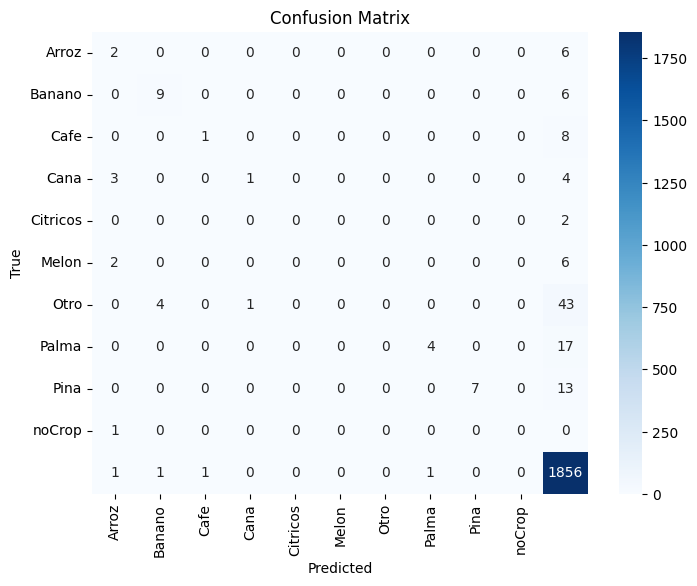

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Add Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rndf.classes_, yticklabels=rndf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [26]:
#import pickle

#let's store our models
#pickle.dump(rndf ,open('rndf.mdl','wb'))#random forest regression
#to load our model back into ram we can call the load method for each saved model
#rndf = pickle.load(open('rndf.mdl', 'rb'))

In [29]:
value_percentages = gdfCrop_sampled['Cultivo'].value_counts(normalize=True) * 100
print(value_percentages)

Cultivo
noCrop      91.684
Otro         2.537
Palma        1.341
Pina         1.138
Banano       1.009
Arroz        0.711
Cana         0.569
Cafe         0.479
Melon        0.283
Citricos     0.240
Sandia       0.009
Name: proportion, dtype: float64
